In [33]:
from IPython.display import display, clear_output
import keyboard
import numpy as np
import time
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams['figure.dpi'] = 300


#### Definimos: $$t(\omega)=\frac{-\kappa}{(\Omega-\omega)-i\kappa-i\frac{g^2}{i(\Delta E-\omega)+\gamma}}$$

In [34]:
def t_w (w, k, Omega, DeltaE, gamma, g):
    numerador = -k
    denominador = (Omega-w) - 1j * k - 1j * g**2 / (1j * (DeltaE - w) + gamma)
    t = numerador / denominador
    return abs(t)

 # Sin ruido

## Creamos base de datos

In [35]:
#Definimos una función que genere la base de datos
def Parameters_generator (num_datos):
    k = np.random.uniform(1e-4, 1e-2, num_datos)
    gamma = np.random.uniform(1e-4, 1e-2, num_datos)
    g = np.random.uniform(1e-4, 1e-2, num_datos)

    return k, gamma, g

num_datos = 5000

In [36]:
# #Creamos base de datos y guardamos en .txt
# k, gamma, g = Parameters_generator (num_datos)
# np.savetxt('Parameters_noNoise_contourPlot.txt', np.column_stack((k, gamma, g)), header='\u03BA \u213D g', encoding='utf-8') 

In [37]:
datos = np.loadtxt('Parameters_noNoise_contourPlot.txt', skiprows=1)
k = datos[:,0]
gamma = datos[:,1]
g = datos[:,2]
Omega = 1
DeltaE_values = np.linspace(0.95, 1.05, 21)

#Creamos los valores de y (la función t(w)) con nuestra base de datos
w_values = np.linspace(0.85, 1.15, 2500)

# Crear una matriz para almacenar los t(w)
t_values = np.zeros((num_datos, len(DeltaE_values), len(w_values)))

for i in range (num_datos):
    for j, DeltaE  in enumerate(DeltaE_values):
        t_values[i,j,:] = t_w(w_values, k[i], Omega, DeltaE, gamma[i], g[i])



## Dibujamos ***Contour plot***

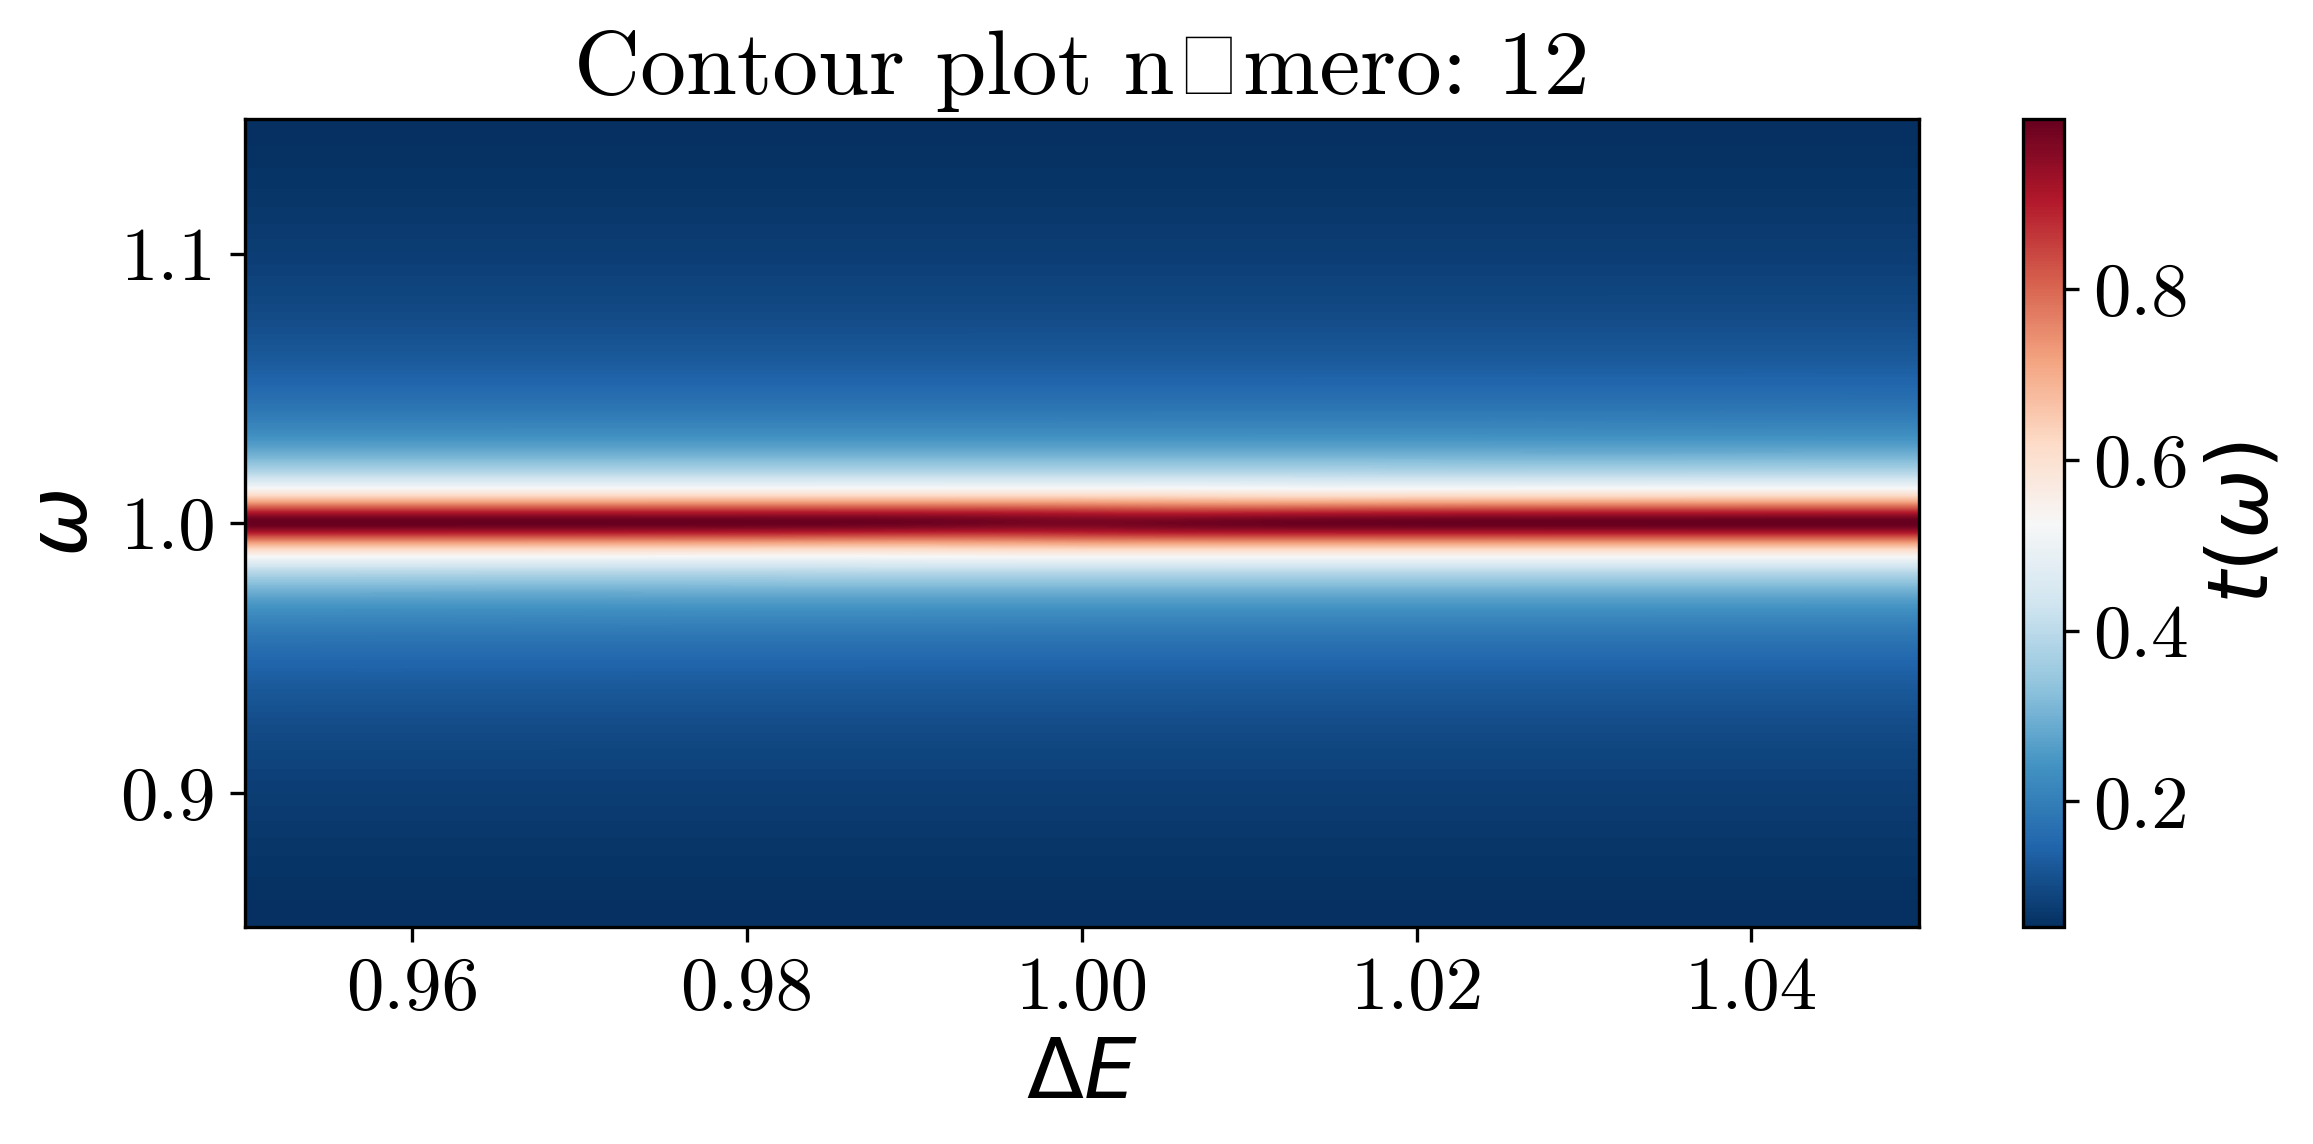

In [56]:
plt.rcParams.update({
    "text.usetex": False,
})

i=0
while i<=num_datos:
    plt.clf()  # Limpia la figura antes de cada iteración
    plt.imshow(t_values[i,:,:].T, extent=[DeltaE_values.min(), DeltaE_values.max(), w_values.min(), w_values.max()],
                    cmap='RdBu_r', origin='lower',
                      aspect='auto', interpolation='spline16') #Para evitar pixeles usar -spline16-, para pixeles -none- o -nearest-
    plt.colorbar(label=r'$t(\omega)$')
    plt.title(f"Contour plot número: {i}")
    plt.xlabel(r'$\Delta E$')
    plt.ylabel(r'$\omega$')
    display(plt.gcf())
    clear_output(wait=True)
    
    if keyboard.is_pressed('esc'): break
    if keyboard.is_pressed('right'): i += 1
    if keyboard.is_pressed('left'): 
        i -= 1       
        if i < 0:
            i += 1


# Dibujos para Memoria

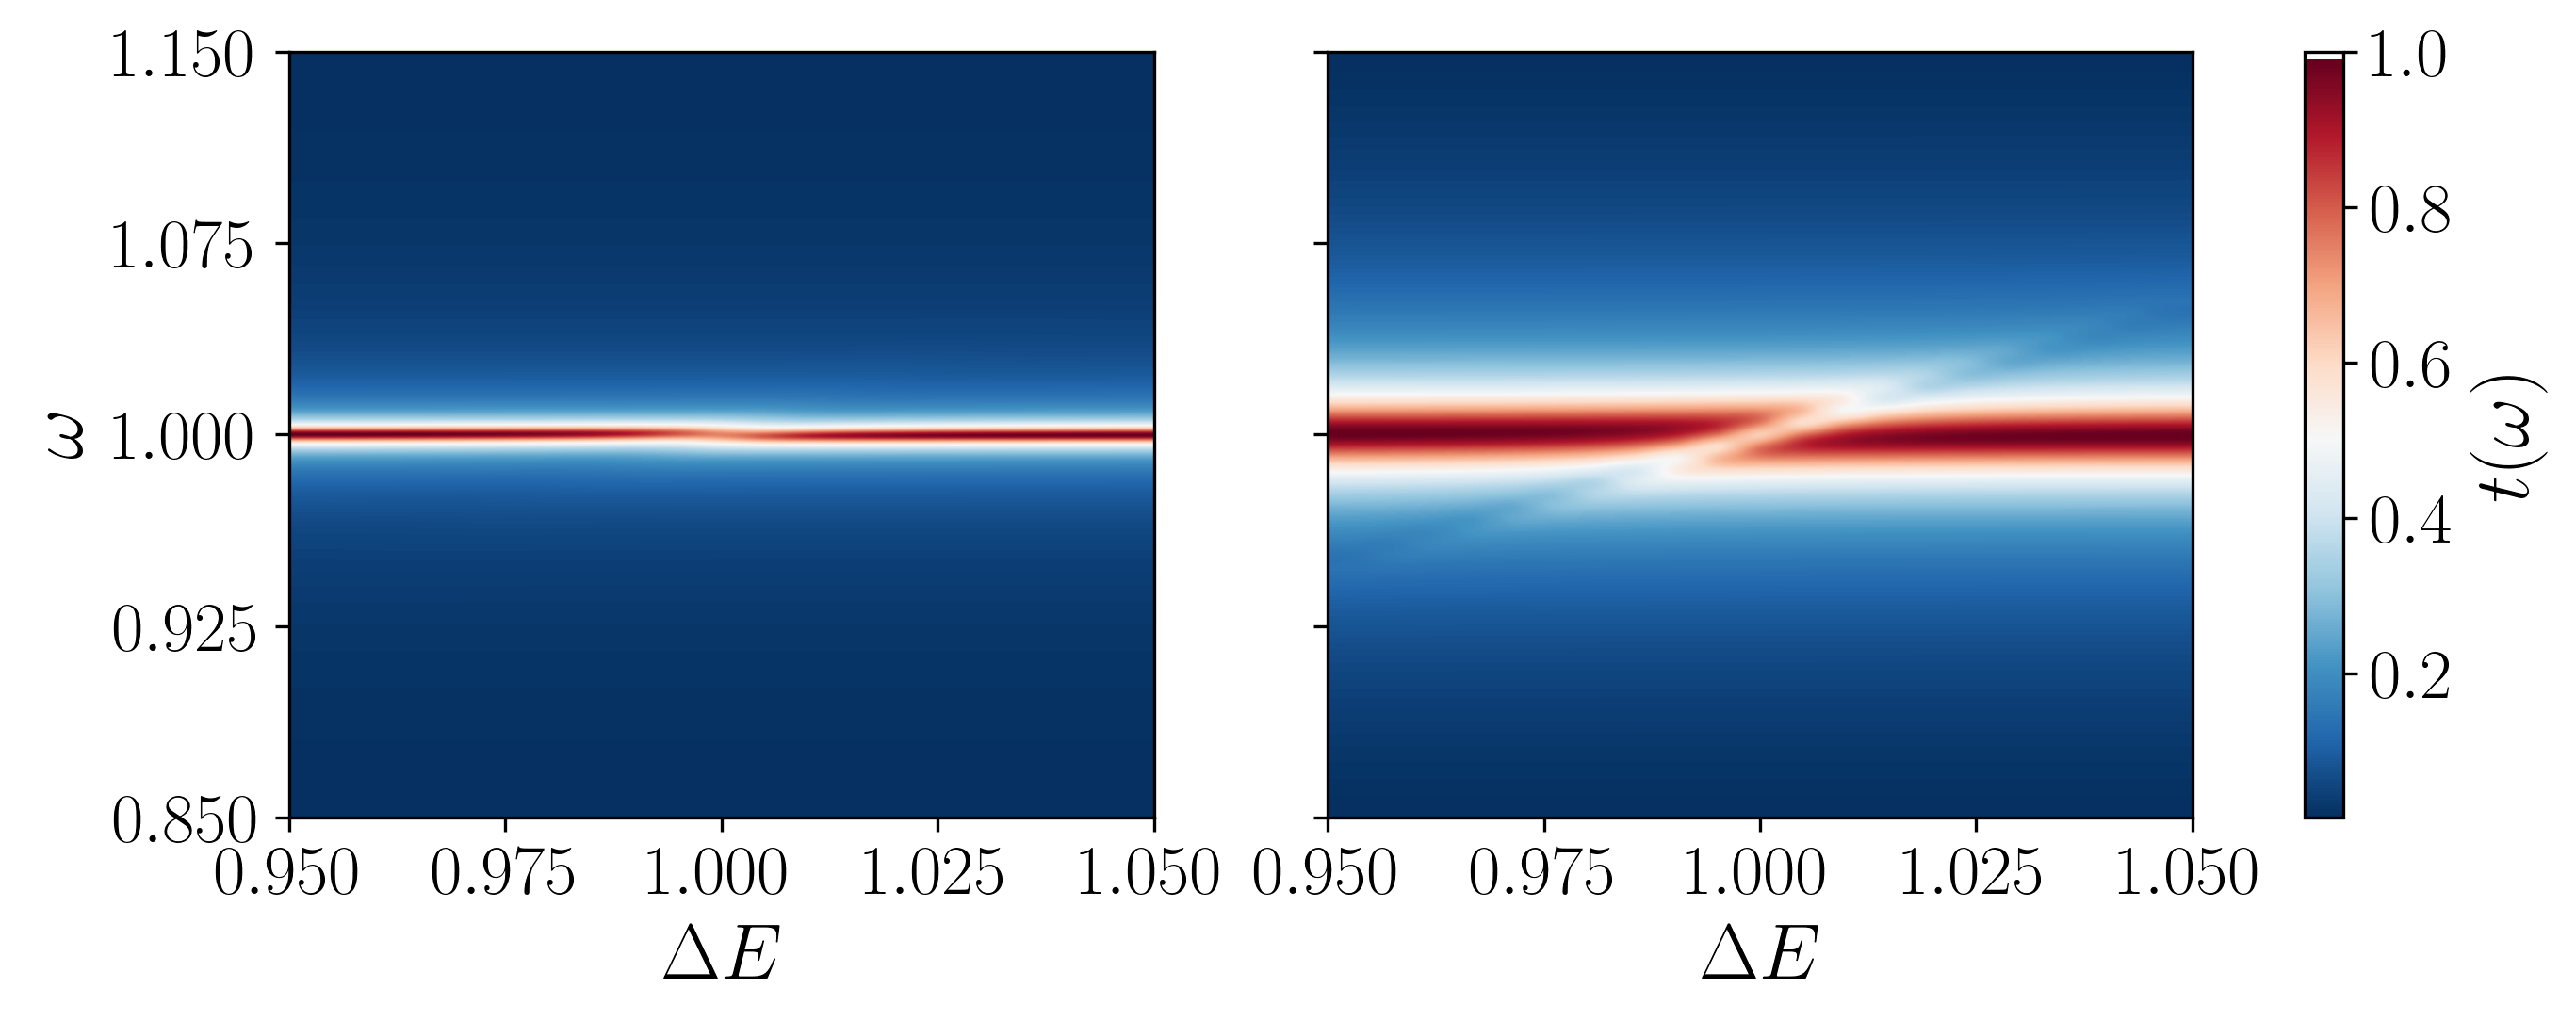

In [60]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['cmr10'], 
    "figure.titlesize": 22,
    "axes.labelsize": 20, 
    "axes.titlesize": 20, 
    "xtick.labelsize": 18, 
    "ytick.labelsize": 18, 
    "legend.fontsize": 18,
    "figure.figsize": [9, 3.5], 
    "figure.dpi": 300 
})


pics = [1,10]

fig, axes = plt.subplots(1, 2, constrained_layout=True)
contours = []

for i, ax in enumerate(axes.flat):
    contour = ax.imshow(t_values[pics[i], :, :].T, extent=[DeltaE_values.min(), DeltaE_values.max(), w_values.min(), w_values.max()],
                        cmap='RdBu_r', origin='lower', aspect='auto', interpolation='spline16')
    
    ax.set_xticks(np.linspace(DeltaE_values.min(), DeltaE_values.max(), 5)) 
    ax.set_yticks(np.linspace(w_values.min(), w_values.max(), 5))     
    ax.set_xlabel(r'$\Delta E$') 
        
    if i % 2 == 0:  
        ax.set_ylabel(r'$\omega$')  # Establecer etiqueta y
    else:  
        ax.tick_params(axis='y', labelleft=False, labelright=False)  
        
    
    contours.append(contour)

# Crear una única barra de color para todas las subfiguras
cbar = fig.colorbar(contours[0], ax=axes, orientation='vertical', fraction=0.05, pad=0.02)
cbar.set_label(r'$t(\omega)$')
cbar.set_ticks([0.2, 0.4, 0.6, 0.8, 1])

plt.show()